In [1]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../../../data/processed/reverts_sampled_500k.csv')
df.head()

,Unnamed: 0,user_id,article_id,revision_id,reverted,time,date,time_first_contribution,num_articles_before_revert,num_reverts_before_revert,num_reverts_after_revert,time_last_edit_before_revert,time_last_revert_before_revert,days_before_revert,days_after_last_edit,days_after_last_revert,target
0,0,90148,245173,241813421,1,2008-09-29 17:35:54,2008-09-29,2008-02-03 20:46:29,79,19,115,2008-09-27,2008-09-23,238,2,6.0,1
1,1,970031,19168,181186825,1,2007-12-31 14:00:30,2007-12-31,2006-11-17 14:37:53,4151,162,4606,2007-12-30,2007-12-29,408,1,2.0,1
2,2,490515,1073455,112809819,1,2007-03-05 14:19:09,2007-03-05,2006-07-20 17:57:36,5110,2030,29795,2007-03-04,2007-03-03,227,1,2.0,1
3,3,607561,2773076,218967723,1,2008-06-12 23:55:24,2008-06-12,2006-07-28 03:08:32,26634,13750,32414,2008-06-11,2008-06-11,685,1,1.0,1
4,4,881194,29328,254122453,1,2008-11-26 00:04:40,2008-11-26,2006-04-23 22:18:15,11316,533,1043,2008-11-25,2008-11-25,947,1,1.0,1


In [3]:
df.shape

(500000, 17)

In [4]:
df = df.dropna()
df.shape

(494758, 17)

In [5]:
df.target.value_counts()

1    493727
0      1031
Name: target, dtype: int64

In [6]:
class0 = df[df.target==0]
class1 = df[df.target==1].sample(df.target.value_counts()[0])

df1 = shuffle(pd.concat([class0, class1]))
df1.shape

(2062, 17)

In [7]:
y = df1.target
X = df1[['num_articles_before_revert', 'num_reverts_before_revert', 
        'days_before_revert', 'days_after_last_edit', 'days_after_last_revert']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
model = RandomForestClassifier(verbose=1)

parameters = {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'auto', 'log2', None],
}

scorer = make_scorer(score_func=accuracy_score)
grid_obj = GridSearchCV(model, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_

/Users/leportella/miniconda3/envs/wiki/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(

[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Paralle

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=1)

In [10]:
grid_obj.best_score_

0.878031878031878

In [11]:
y_pred = best_clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [12]:
joblib.dump(best_clf, '../../../models/any_revert_model_v1.pkl') 

['../../../models/any_revert_model_v1.pkl']

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       311
           1       0.91      0.89      0.90       308

   micro avg       0.90      0.90      0.90       619
   macro avg       0.90      0.90      0.90       619
weighted avg       0.90      0.90      0.90       619



Confusion matrix, without normalization
[[284  27]
 [ 33 275]]


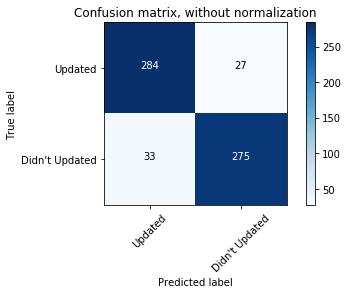

In [14]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes=['Updated', "Didn't Updated"],
                      title='Confusion matrix, without normalization')

In [15]:
pd.DataFrame({'feature': X.columns, 'importances': best_clf.feature_importances_}).sort_values(by='importances',
                                                                                               ascending=False)

,feature,importances
2,days_before_revert,0.287124
0,num_articles_before_revert,0.266161
1,num_reverts_before_revert,0.228896
4,days_after_last_revert,0.112191
3,days_after_last_edit,0.105628
